In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, re, unicodedata, html, hashlib
from datetime import datetime

In [24]:
# # folder_path = '/content/drive/MyDrive/Sore-SheilaDara'
# folder_path = 'youtube_comments_3.csv'
# dataframes = []  # List to store dataframes from different files

# # Check if the folder exists
# if not os.path.exists(folder_path):
#     print(f"Error: Folder '{folder_path}' not found. Please make sure the path is correct.")
# else:
#     # Get the list of all files in the folder
#     files_in_folder = os.listdir(folder_path)
#     print(f"Files found in '{folder_path}':")
#     for file_name in files_in_folder:
#         print(f"- {file_name}")

#         full_file_path = os.path.join(folder_path, file_name)

#         # Try to read the file based on its extension
#         try:
#             if file_name.endswith('.csv'):
#                 df = pd.read_csv(full_file_path)
#                 print(f"\n--- Data from '{file_name}' (CSV) ---")
#                 print(df.head())  # Display the first few rows
#                 print(f"Shape: {df.shape}")
#                 dataframes.append(df)  # Add to the list
#             elif file_name.endswith('.xlsx') or file_name.endswith('.xls'):
#                 df = pd.read_excel(full_file_path)
#                 print(f"\n--- Data from '{file_name}' (Excel) ---")
#                 print(df.head())
#                 print(f"Shape: {df.shape}")
#                 dataframes.append(df)  # Add to the list
#             elif file_name.endswith('.json'):
#                 df = pd.read_json(full_file_path)
#                 print(f"\n--- Data from '{file_name}' (JSON) ---")
#                 print(df.head())
#                 print(f"Shape: {df.shape}")
#                 dataframes.append(df)  # Add to the list
#             elif file_name.endswith('.txt'):
#                 print(f"\n--- Reading '{file_name}' as a plain text file ---")
#                 with open(full_file_path, 'r', encoding='utf-8', errors='ignore') as f:
#                     content = f.read()
#                     print(content[:500])  # Print the first 500 characters
#             else:
#                 print(f"\nUnrecognized file format for '{file_name}'. Extension is unknown or not a tabular format.")

#         except Exception as e:
#             print(f"Failed to read '{file_name}': {e}")
#         print("\n" + "="*50 + "\n")  # Separator between files

#     # Combine all collected dataframes
#     if dataframes:
#         df_merge = pd.concat(dataframes, ignore_index=True)
#         print("\n--- Merged Data from All Files (df_merge) ---")
#         print(df_merge.head())
#         print(f"Shape: {df_merge.shape}")
#     else:
#         print("\nNo CSV, Excel, or JSON files were found to merge.")

In [25]:
folder_path = 'youtube_comments_3.csv'
df_merge = pd.read_csv(folder_path)

In [26]:
df_merge

,username,comment,link_video,publish_date,like_count,view_count
0,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
1,@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...",https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
2,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
3,@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ...",https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
4,@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape...",https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
...,...,...,...,...,...,...
11380,@kinshafanaillufar7112,kak sheila hidupnya lurus lurus aja jadi hal y...,https://www.youtube.com/watch?v=HtprXG01wO0&pp...,2025-06-19,189,6254
11381,@perkyoracles7534,Dion lucu banget,https://www.youtube.com/watch?v=HtprXG01wO0&pp...,2025-06-19,189,6254
11382,@randilkwu7276,Can't wait,https://www.youtube.com/watch?v=HtprXG01wO0&pp...,2025-06-19,189,6254
11383,@TomiyamaEkaSetiaAndini,Nah 8 Min Aja Ya Bang Dion 30 Min Kepanjangan.,https://www.youtube.com/watch?v=HtprXG01wO0&pp...,2025-06-19,189,6254


In [27]:
df = df_merge.copy()

print("Shape awal df_merge:", df.shape)
df.head()

Shape awal df_merge: (11385, 6)


,username,comment,link_video,publish_date,like_count,view_count
0,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
1,@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...",https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
2,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
3,@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ...",https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
4,@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape...",https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11385 entries, 0 to 11384
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   username      11359 non-null  object
 1   comment       11227 non-null  object
 2   link_video    11385 non-null  object
 3   publish_date  11385 non-null  object
 4   like_count    11385 non-null  int64 
 5   view_count    11385 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 533.8+ KB


In [29]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower()
print("Available columns:", df.columns.tolist())

Available columns: ['username', 'comment', 'link_video', 'publish_date', 'like_count', 'view_count']


In [30]:
# Ensure required columns exist
if 'username' not in df.columns or 'comment' not in df.columns:
    raise ValueError("Columns 'username' and/or 'comment' not found.")

# Select main columns + optional if available
keep_cols = ['username', 'comment']
for col in ['timestamp', 'likes', 'replies']:
    if col in df.columns:
        keep_cols.append(col)

df = df[keep_cols]
print("Columns used:", df.columns.tolist())
print("Shape after column selection:", df.shape)

df.head()

Columns used: ['username', 'comment']
Shape after column selection: (11385, 2)


,username,comment
0,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...
1,@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k..."
2,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...
3,@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ..."
4,@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape..."


In [31]:
# Drop NA before any conversion
before_dropna = df.shape[0]
df = df.dropna(subset=['username', 'comment'])
after_dropna = df.shape[0]
print(f"Rows dropped due to missing username/comment: {before_dropna - after_dropna}")


Rows dropped due to missing username/comment: 184


In [32]:
# Save raw versions
df['username_raw'] = df['username']
df['comment_raw']  = df['comment']

df.head()

,username,comment,username_raw,comment_raw
0,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...
1,@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...",@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k..."
2,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...
3,@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ...",@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ..."
4,@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape...",@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape..."


In [33]:
# Light cleaning: lowercase, remove URLs, normalize spaces (keep emojis & punctuation)
url_pattern = re.compile(r'http\S+|www\.\S+')

# Create a new column 'comment_clean' (manual loop for clarity)
clean_light_list = []
for txt in df['comment_raw'].astype(str):
    t = txt.strip()
    t = url_pattern.sub(' ', t)
    t = re.sub(r'\s+', ' ', t)
    t = t.lower()
    clean_light_list.append(t)
df['comment_clean'] = clean_light_list

# Aggressive plain: keep only alphanumeric and space
plain_list = []
for txt in df['comment_clean']:
    t = re.sub(r'[^0-9a-zA-Z\s]', ' ', txt)
    t = re.sub(r'\s+', ' ', t).strip()
    plain_list.append(t)
df['comment_plain'] = plain_list

df[['comment_raw', 'comment_clean', 'comment_plain']].head(10)

,comment_raw,comment_clean,comment_plain
0,Om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...
1,"Gila sabtu ini gue bahagia banget,sheila dtg k...","gila sabtu ini gue bahagia banget,sheila dtg k...",gila sabtu ini gue bahagia banget sheila dtg k...
2,Salut sama keterbukaan dan kejujuran Vidi & Sh...,salut sama keterbukaan dan kejujuran vidi & sh...,salut sama keterbukaan dan kejujuran vidi shei...
3,"Ya Allah, beri vidi kesehatan & panjang umur, ...","ya allah, beri vidi kesehatan & panjang umur, ...",ya allah beri vidi kesehatan panjang umur krn ...
4,"Dari awal cuma mau nonton iseng, eh malah dape...","dari awal cuma mau nonton iseng, eh malah dape...",dari awal cuma mau nonton iseng eh malah dapet...
5,Baru Mulai aja udah pecahh Makin betah sama k...,baru mulai aja udah pecahh makin betah sama ko...,baru mulai aja udah pecahh makin betah sama ko...
6,WAIT?AKHIRNYAAAAA,wait?akhirnyaaaaa,wait akhirnyaaaaa
7,Terharu banget waktu denger sheila ngomong kur...,terharu banget waktu denger sheila ngomong kur...,terharu banget waktu denger sheila ngomong kur...
8,Gila sih Sheila emang bener2 paling tau bange...,gila sih sheila emang bener2 paling tau banget...,gila sih sheila emang bener2 paling tau banget...
9,"sesuai ekspektasi banget, liat sheila berkelia...","sesuai ekspektasi banget, liat sheila berkelia...",sesuai ekspektasi banget liat sheila berkeliar...


In [34]:
# Define duplicates as same (username, comment_raw)
before_dups = df.shape[0]
df = df.drop_duplicates(subset=['username', 'comment_raw'])
after_dups = df.shape[0]
print(f"Duplicates removed: {before_dups - after_dups}")

df.shape

Duplicates removed: 4807


(6394, 6)

In [35]:
# Character and token length
df['char_len']  = df['comment_clean'].str.len()
df['token_len'] = df['comment_plain'].str.split().apply(len)

# Flag questions
df['has_question'] = df['comment_clean'].str.contains(r'\?', regex=True)

# Count emojis (based on unicode pattern)
emoji_pattern = re.compile(
    r'['
    r'\U0001F300-\U0001F6FF'
    r'\U0001F900-\U0001F9FF'
    r'\U0001F1E0-\U0001F1FF'
    r'\U00002700-\U000027BF'
    r'\U00002600-\U000026FF'
    r'\U0001FA70-\U0001FAFF'
    r']'
)

emoji_counts = []
for txt in df['comment_clean']:
    emoji_counts.append(len(emoji_pattern.findall(txt)))
df['emoji_count'] = emoji_counts

In [36]:
# Regex variations: 'sheila', 'sheila dara', 'mbak sheila'
sheila_regex = re.compile(r'\b(mbak\s+sheila|sheila\s+dara|sheila)\b', re.IGNORECASE)

# Flag if comment contains any of the 'sheila' variations
has_sheila_list = []
for txt in df['comment_clean']:
    has_sheila_list.append(bool(sheila_regex.search(txt)))
df['has_sheila'] = has_sheila_list

df[['comment_clean', 'has_sheila']].head(15)

,comment_clean,has_sheila
0,om ded kaya seneng bangga bgttt lihat mereka b...,True
1,"gila sabtu ini gue bahagia banget,sheila dtg k...",True
2,salut sama keterbukaan dan kejujuran vidi & sh...,True
3,"ya allah, beri vidi kesehatan & panjang umur, ...",False
4,"dari awal cuma mau nonton iseng, eh malah dape...",True
5,baru mulai aja udah pecahh makin betah sama ko...,False
6,wait?akhirnyaaaaa,False
7,terharu banget waktu denger sheila ngomong kur...,True
8,gila sih sheila emang bener2 paling tau banget...,True
9,"sesuai ekspektasi banget, liat sheila berkelia...",True


In [37]:
# Summary statistics
summary = {
    'rows_final'        : int(df.shape[0]),
    'unique_users'      : int(df['username'].nunique()),
    'avg_tokens'        : round(df['token_len'].mean(), 2),
    'median_tokens'     : int(df['token_len'].median()),
    'pct_has_emoji'     : round(100 * (df['emoji_count'] > 0).mean(), 2),
    'pct_question'      : round(100 * df['has_question'].mean(), 2),
    'sheila_mentions'   : int(df['has_sheila'].sum()),
    'sheila_share_pct'  : round(100 * df['has_sheila'].mean(), 2),
    # 'suspect_user_pct'  : round(100 * df['suspect_user'].mean(), 2),  # Uncomment if applicable
}

summary

{'rows_final': 6394,
 'unique_users': 5668,
 'avg_tokens': 15.07,
 'median_tokens': 8,
 'pct_has_emoji': 1.74,
 'pct_question': 6.46,
 'sheila_mentions': 1044,
 'sheila_share_pct': 16.33}

In [38]:
# Top 10 users by number of comments
top_users = df['username'].value_counts().head(10)
top_users

username
@widy-w4s           14
@AsmitaSariAsis      9
@huangcuping1801     8
@Fakhriimtyzz_       7
@Prayudha88          6
@Quadraterz          6
@fanifadilah2366     6
@huahuahua280        6
@agvelfakhri6168     6
@sendy483            6
Name: count, dtype: int64

# EDA

In [39]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

# Ensure df exists from previous cleaning steps
print("Shape of cleaned df:", df.shape)
df.head()

Shape of cleaned df: (6394, 11)


,username,comment,username_raw,comment_raw,comment_clean,comment_plain,char_len,token_len,has_question,emoji_count,has_sheila
0,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...,212,35,False,0,True
1,@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...",@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...","gila sabtu ini gue bahagia banget,sheila dtg k...",gila sabtu ini gue bahagia banget sheila dtg k...,104,19,False,0,True
2,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,salut sama keterbukaan dan kejujuran vidi & sh...,salut sama keterbukaan dan kejujuran vidi shei...,215,31,False,0,True
3,@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ...",@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ...","ya allah, beri vidi kesehatan & panjang umur, ...",ya allah beri vidi kesehatan panjang umur krn ...,86,13,False,0,False
4,@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape...",@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape...","dari awal cuma mau nonton iseng, eh malah dape...",dari awal cuma mau nonton iseng eh malah dapet...,133,23,False,0,True


In [40]:
# Basic Statistics
# Ensure the dataset is intact and not corrupted, malformed, or half-loaded

display(df.head(3))
print("\n=== INFO ===")
print(df.info())

print("\n=== DESCRIPTIVE STATS: token_len & char_len ===")
print(df[['token_len','char_len','emoji_count']].describe())

print("\nNumber of unique users:", df['username'].nunique())
print("Proportion of Sheila mentions: %.2f%%" % (100*df['has_sheila'].mean()))
print("Proportion of question-mark comments: %.2f%%" % (100*df['has_question'].mean()))
print("Proportion of comments with emojis: %.2f%%" % (100*(df['emoji_count'] > 0).mean()))
# print("Proportion of suspect users: %.2f%%" % (100*df['suspect_user'].mean()))

,username,comment,username_raw,comment_raw,comment_clean,comment_plain,char_len,token_len,has_question,emoji_count,has_sheila
0,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...,212,35,False,0,True
1,@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...",@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...","gila sabtu ini gue bahagia banget,sheila dtg k...",gila sabtu ini gue bahagia banget sheila dtg k...,104,19,False,0,True
2,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,salut sama keterbukaan dan kejujuran vidi & sh...,salut sama keterbukaan dan kejujuran vidi shei...,215,31,False,0,True



=== INFO ===
<class 'pandas.core.frame.DataFrame'>
Index: 6394 entries, 0 to 11377
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   username       6394 non-null   object
 1   comment        6394 non-null   object
 2   username_raw   6394 non-null   object
 3   comment_raw    6394 non-null   object
 4   comment_clean  6394 non-null   object
 5   comment_plain  6394 non-null   object
 6   char_len       6394 non-null   int64 
 7   token_len      6394 non-null   int64 
 8   has_question   6394 non-null   bool  
 9   emoji_count    6394 non-null   int64 
 10  has_sheila     6394 non-null   bool  
dtypes: bool(2), int64(3), object(6)
memory usage: 512.0+ KB
None

=== DESCRIPTIVE STATS: token_len & char_len ===
         token_len     char_len  emoji_count
count  6394.000000  6394.000000  6394.000000
mean     15.073976    91.607288     0.029715
std      30.796223   194.534949     0.269508
min       0.000000     1.0000

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


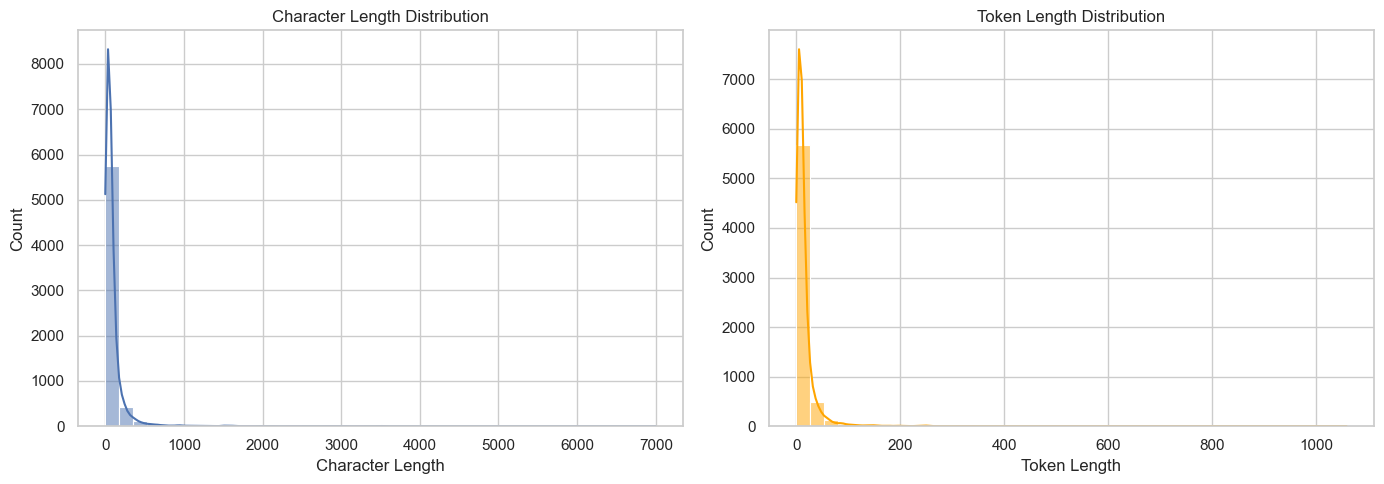

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


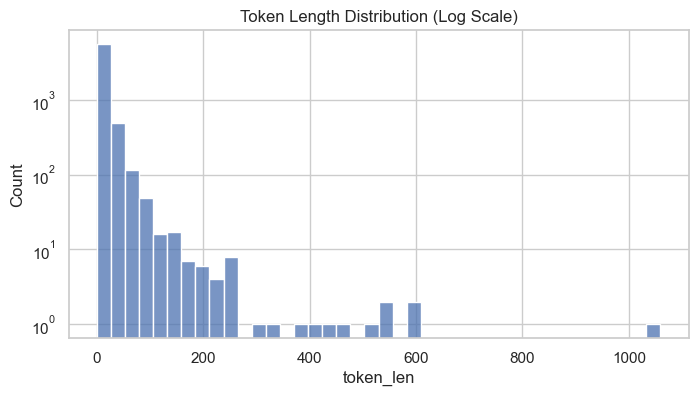

In [41]:
# COMMENT LENGTH DISTRIBUTION
# Helps to understand variation in word count; for example, a sentence like "cool and great"
# contains multiple words with possibly different weight or tone even if both are positive

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['char_len'], bins=40, kde=True, ax=axes[0])
axes[0].set_title('Character Length Distribution')
axes[0].set_xlabel('Character Length')

sns.histplot(df['token_len'], bins=40, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Token Length Distribution')
axes[1].set_xlabel('Token Length')

plt.tight_layout()
plt.show()

# Log-scale (for long tail visualization)
plt.figure(figsize=(8, 4))
sns.histplot(df['token_len'], bins=40)
plt.yscale('log')
plt.title('Token Length Distribution (Log Scale)')
plt.show()

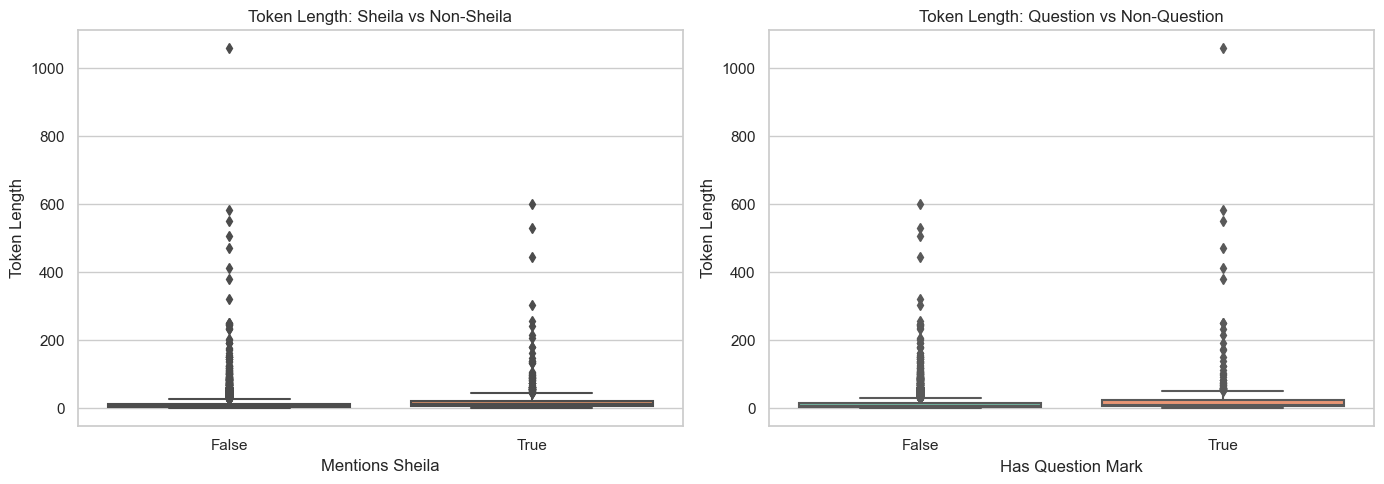

In [42]:
# HISTOGRAM COMPARISON: Sheila vs Non-Sheila, Question vs Non
# Helps identify "outliers" in comment patterns.
# If Sheila-related comments tend to be longer or more expressive,
# this might indicate stronger engagement.

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x=df['has_sheila'], y=df['token_len'], ax=axes[0])
axes[0].set_xlabel('Mentions Sheila')
axes[0].set_ylabel('Token Length')
axes[0].set_title('Token Length: Sheila vs Non-Sheila')

sns.boxplot(x=df['has_question'], y=df['token_len'], ax=axes[1], palette='Set2')
axes[1].set_xlabel('Has Question Mark')
axes[1].set_ylabel('Token Length')
axes[1].set_title('Token Length: Question vs Non-Question')

plt.tight_layout()
plt.show()

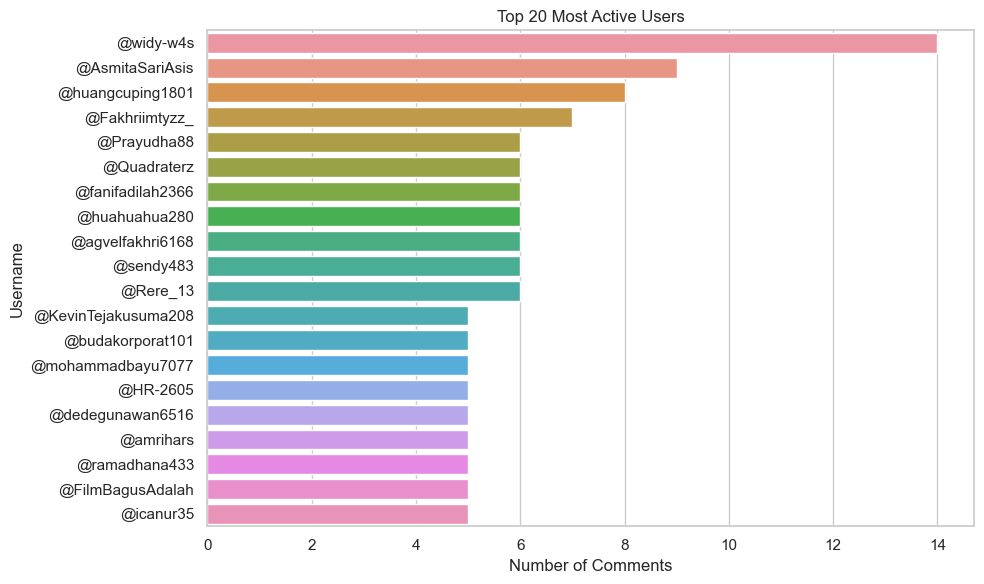

username
@widy-w4s              14
@AsmitaSariAsis         9
@huangcuping1801        8
@Fakhriimtyzz_          7
@Prayudha88             6
@Quadraterz             6
@fanifadilah2366        6
@huahuahua280           6
@agvelfakhri6168        6
@sendy483               6
@Rere_13                6
@KevinTejakusuma208     5
@budakorporat101        5
@mohammadbayu7077       5
@HR-2605                5
@dedegunawan6516        5
@amrihars               5
@ramadhana433           5
@FilmBagusAdalah        5
@icanur35               5
Name: count, dtype: int64

In [43]:
# Top 20 Most Active Users
# To check if a few users dominate the conversation (bias) or if it's more evenly spread (organic)

top_users = df['username'].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(y=top_users.index, x=top_users.values)
plt.title('Top 20 Most Active Users')
plt.xlabel('Number of Comments')
plt.ylabel('Username')
plt.tight_layout()
plt.show()

top_users

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


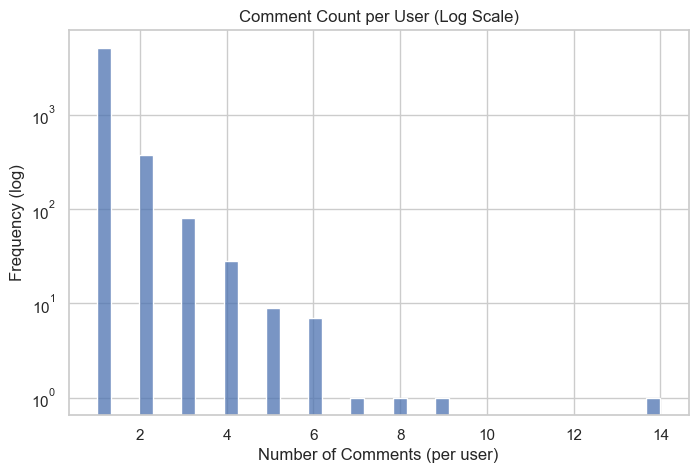

count    5668.000000
mean        1.128088
std         0.513280
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        14.000000
Name: count, dtype: float64

In [44]:
# Comment Distribution per User
# Helps identify users with few vs. many comments
# to ensure a normal participation curve and avoid skew

user_counts = df['username'].value_counts()

plt.figure(figsize=(8, 5))
sns.histplot(user_counts, bins=40, kde=False)
plt.yscale('log')
plt.title('Comment Count per User (Log Scale)')
plt.xlabel('Number of Comments (per user)')
plt.ylabel('Frequency (log)')
plt.show()

user_counts.describe()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23616\2241750579.py:30: UserWarning: Glyph 129401 (\N{FACE HOLDING BACK TEARS}) missing from current font.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23616\2241750579.py:30: UserWarning: Glyph 129782 (\N{HEART HANDS}) missing from current font.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23616\2241750579.py:30: UserWarning: Glyph 129781 (\N{INDEX POINTING AT THE VIEWER}) missing from current font.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23616\2241750579.py:30: UserWarning: Glyph 129776 (\N{HAND WITH INDEX FINGER AND THUMB CROSSED}) missing from current font.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23616\2241750579.py:30: UserWarning: Glyph 10023 (\N{WHITE FOUR POINTED STAR}) missing from current font.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23616\2241750579.py:30: UserWarning: Glyph 129760 (\N{MELTING FACE}) missing from

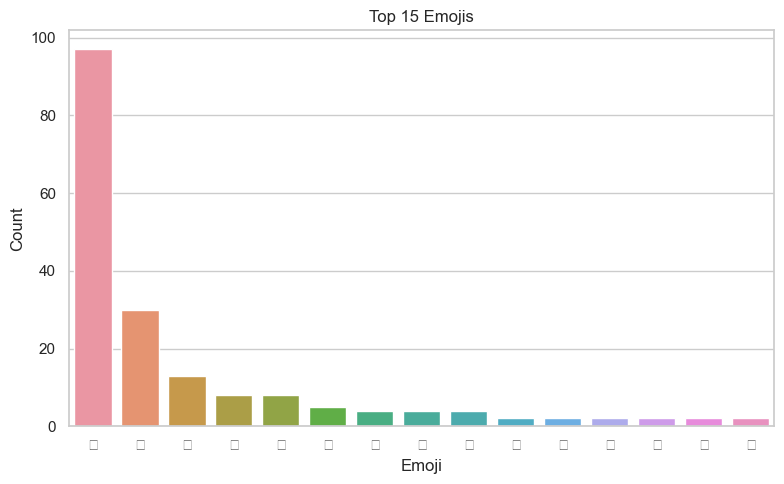

,emoji,count
0,🥹,97
1,🫶,30
2,🫵,13
3,🫰,8
4,✧,8
5,🫠,5
6,🫡,4
7,❝,4
8,❞,4
9,🫣,2


In [45]:
# Emoji Proportion already summarized; now display Top Emojis
# Extract emojis from comment_clean

from collections import Counter

emoji_pattern = re.compile(
    r'['
    r'\U0001F300-\U0001F6FF'
    r'\U0001F900-\U0001F9FF'
    r'\U0001F1E0-\U0001F1FF'
    r'\U00002700-\U000027BF'
    r'\U00002600-\U000026FF'
    r'\U0001FA70-\U0001FAFF'
    r']'
)

all_emoji = []
for txt in df['comment_clean']:
    all_emoji.extend(emoji_pattern.findall(txt))

emoji_counter = Counter(all_emoji)
top_emoji = emoji_counter.most_common(15)
top_emoji_df = pd.DataFrame(top_emoji, columns=['emoji','count'])

plt.figure(figsize=(8,5))
sns.barplot(data=top_emoji_df, x='emoji', y='count')
plt.title('Top 15 Emojis')
plt.xlabel('Emoji')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

top_emoji_df

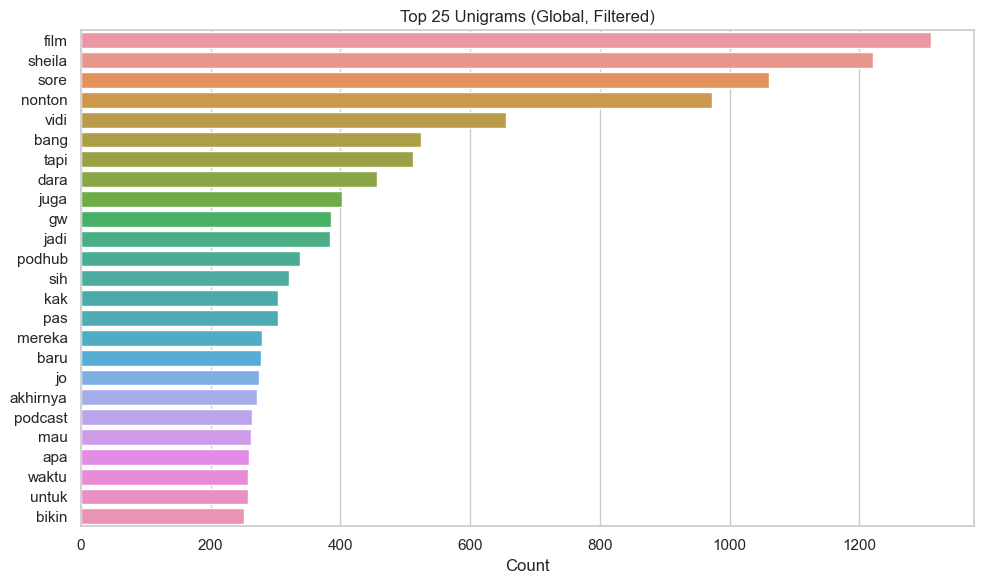

,term,count
0,film,1311
1,sheila,1221
2,sore,1061
3,nonton,973
4,vidi,655
5,bang,524
6,tapi,512
7,dara,456
8,juga,402
9,gw,385


In [54]:
# Unigram (Most Frequent Words)

from collections import Counter

# Get tokens from comment_plain
tokens_global = []
for txt in df['comment_plain']:
    tokens_global.extend(txt.split())

# Simple stopwords list (can be expanded)
stopwords = {
    'dan','yang','di','ke','dengan','atau','ini','itu','ya','kok','aja','si','karena','buat',
    'banget','bgt','udah','lagi','the','to','of','a','in','itu','nya','ga','gak','nggak','yg',
    'saya','aku','ada','dari','bisa','sama','dia'
}

tokens_filtered = [t for t in tokens_global if t and t not in stopwords and len(t) > 1]
count_uni = Counter(tokens_filtered).most_common(25)
unigram_df = pd.DataFrame(count_uni, columns=['term', 'count'])

plt.figure(figsize=(10,6))
sns.barplot(data=unigram_df, y='term', x='count')
plt.title('Top 25 Unigrams (Global, Filtered)')
plt.xlabel('Count')
plt.ylabel('')
plt.tight_layout()
plt.show()

unigram_df.head(10)

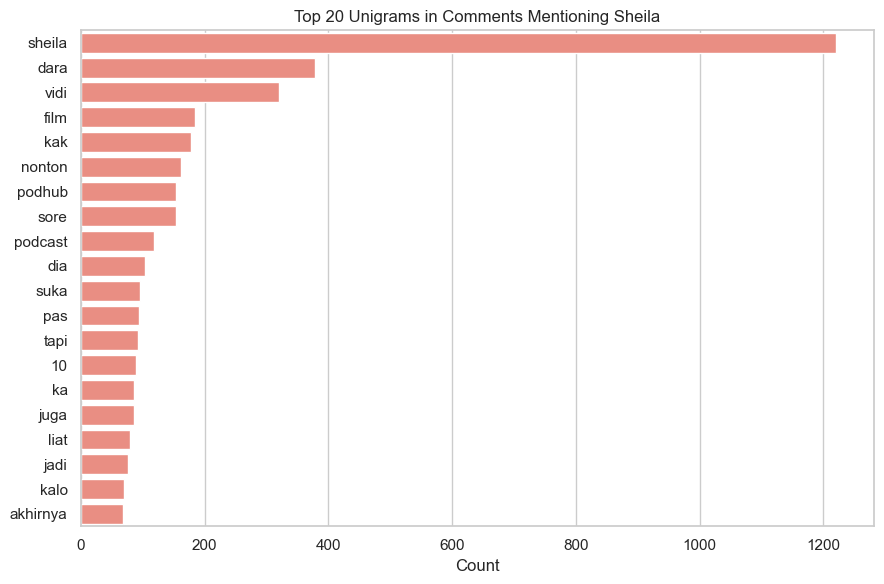

,term,count
0,sheila,1221
1,dara,378
2,vidi,320
3,film,185
4,kak,178
5,nonton,161
6,podhub,154
7,sore,154
8,podcast,118
9,dia,104


In [47]:
# Unigrams in Sheila-Mentioning Comments

sheila_tokens = []
subset_sheila = df[df['has_sheila']]
for txt in subset_sheila['comment_plain']:
    sheila_tokens.extend(txt.split())

sheila_tokens_f = [t for t in sheila_tokens if t not in stopwords and len(t) > 1]
count_sheila_uni = Counter(sheila_tokens_f).most_common(20)
sheila_uni_df = pd.DataFrame(count_sheila_uni, columns=['term','count'])

plt.figure(figsize=(9,6))
sns.barplot(data=sheila_uni_df, y='term', x='count', color='salmon')
plt.title('Top 20 Unigrams in Comments Mentioning Sheila')
plt.xlabel('Count')
plt.ylabel('')
plt.tight_layout()
plt.show()

sheila_uni_df.head(10)

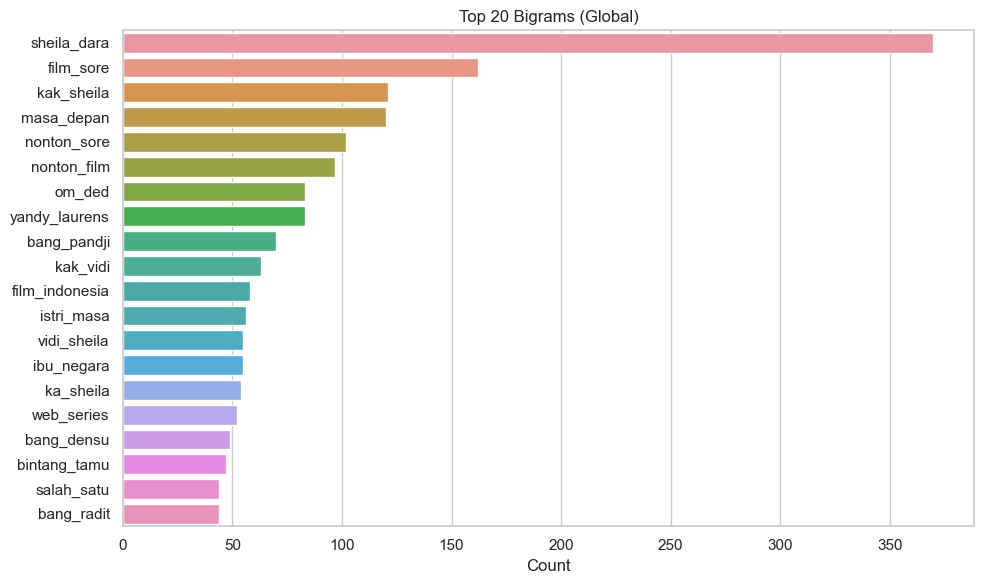

,bigram,count
0,sheila_dara,370
1,film_sore,162
2,kak_sheila,121
3,masa_depan,120
4,nonton_sore,102


In [48]:
# Bigrams (2-word phrases)

from itertools import tee

def bigrams(tokens):
    a, b = tee(tokens)
    next(b, None)
    for x, y in zip(a, b):
        yield f"{x}_{y}"

bigrams_global = []
for txt in df['comment_plain']:
    toks = [t for t in txt.split() if t not in stopwords and len(t) > 1]
    bigrams_global.extend(list(bigrams(toks)))

bigram_counts = Counter(bigrams_global).most_common(20)
bigram_df = pd.DataFrame(bigram_counts, columns=['bigram', 'count'])

plt.figure(figsize=(10,6))
sns.barplot(data=bigram_df, y='bigram', x='count')
plt.title('Top 20 Bigrams (Global)')
plt.xlabel('Count')
plt.ylabel('')
plt.tight_layout()
plt.show()

bigram_df.head()

In [50]:
# Jalankan jika perlu visual wordcloud
%pip install wordcloud -q


Note: you may need to restart the kernel to use updated packages.


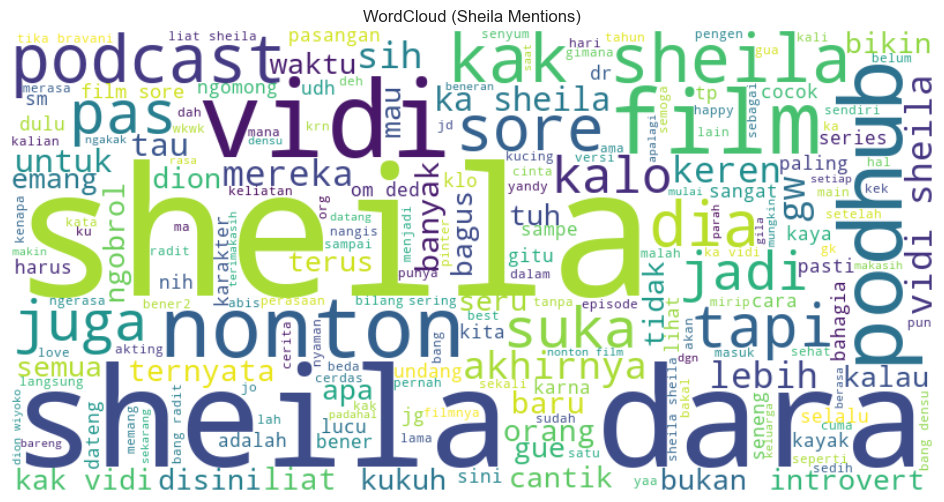

In [55]:
from wordcloud import WordCloud

# WordCloud: Sheila-related tokens
text_wc = ' '.join(sheila_tokens_f)
wc = WordCloud(width=800, height=400, background_color='white').generate(text_wc)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud (Sheila Mentions)')
plt.show()

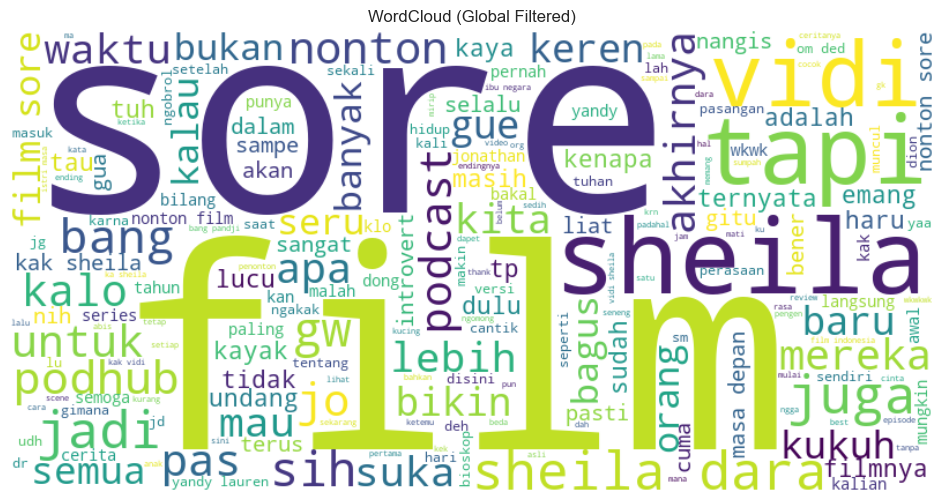

In [56]:
# WordCloud: All tokens (filtered)
text_wc = ' '.join(tokens_filtered)
wc = WordCloud(width=800, height=400, background_color='white').generate(text_wc)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud (Global Filtered)')
plt.show()

In [ ]:
# num_cols = ['char_len','token_len','emoji_count']
# if 'likes' in df.columns: num_cols.append('likes')
# if 'replies' in df.columns: num_cols.append('replies')

# corr = df[num_cols].corr()

# plt.figure(figsize=(6,5))
# sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
# plt.title('Korelasi Fitur Numerik')
# plt.show()
# corr


In [ ]:
# plt.figure(figsize=(8,5))
# sns.scatterplot(data=df.sample(min(2000, len(df))), x='token_len', y='emoji_count',
#                 hue='has_sheila', alpha=0.6)
# plt.title('Token Length vs Emoji Count (sample)')
# plt.xlabel('Token Length')
# plt.ylabel('Emoji Count')
# plt.tight_layout()
# plt.show()


In [ ]:
summary_auto = {}

summary_auto['total_comments'] = len(df)
summary_auto['unique_users'] = df['username'].nunique()
summary_auto['median_tokens'] = int(df['token_len'].median())
summary_auto['pct_question'] = round(100 * df['has_question'].mean(), 2)
summary_auto['pct_has_emoji'] = round(100 * (df['emoji_count']>0).mean(), 2)
summary_auto['sheila_share_pct'] = round(100 * df['has_sheila'].mean(), 2)
summary_auto['top_user'] = df['username'].value_counts().index[0]
summary_auto['top_user_comments'] = int(df['username'].value_counts().iloc[0])
summary_auto

# Tampilkan 5 kata paling sering (global & sheila)
summary_auto['top5_unigram_global'] = unigram_df.head(5)['term'].tolist()
summary_auto['top5_unigram_sheila'] = sheila_uni_df.head(5)['term'].tolist() if len(df[df['has_sheila']])>0 else []
summary_auto


{'total_comments': 6394,
 'unique_users': 5668,
 'median_tokens': 8,
 'pct_question': np.float64(6.46),
 'pct_has_emoji': np.float64(1.74),
 'sheila_share_pct': np.float64(16.33),
 'top_user': '@widy-w4s',
 'top_user_comments': 14,
 'top5_unigram_global': ['film', 'sheila', 'sore', 'nonton', 'vidi'],
 'top5_unigram_sheila': ['sheila', 'dara', 'vidi', 'film', 'kak']}

# **Base Line Sentiment Rule-Based**

In [ ]:
# Dictionary definition and parameter

In [ ]:
# --- 1.1 Positive / Negative word lexicons (extend as needed) ---
lex_pos = {
    'bagus', 'keren', 'kerenbanget', 'suka', 'mantap', 'natural', 'gemes', 'lucu', 'haru',
    'mengena', 'rapi', 'smooth', 'strong', 'greget', 'niat', 'cantik', 'chemistry', 'top',
    'mantul', 'juara', 'stabil', 'kerennya', 'bagusnya', 'recommend', 'recommended',
    'powerful', 'wah', 'wow', 'apik', 'solid', 'kocak', 'ngena', 'bahagia', 'seneng',
    'inspiratif', 'salut', 'sehat', 'sukses', 'sayang', 'kerenabis', 'terbaik',
    'bangga', 'ceria', 'adem', 'sembuh', 'setia'
}

lex_neg = {
    'jelek', 'garing', 'lebay', 'aneh', 'nanggung', 'lambat', 'bosan', 'bosen', 'buruk',
    'kaku', 'maksa', 'berantakan', 'cringe', 'payah', 'parah', 'kampungan', 'anehnya',
    'melelahkan', 'membosankan', 'kurang', 'letoy', 'cupu', 'gaje', 'gagal',
    'sakit', 'kasihan', 'kecewa', 'masalah', 'takut', 'sedih'
}

# --- 1.2 Bigram (two-word phrase) sentiment lexicons ---
bigram_pos = {
    'akting natural', 'chemistry kuat', 'cerita kuat', 'alur rapi', 'ending bagus',
    'chemistry dapet', 'akting bagus', 'akting keren', 'semoga lekas',
    'lekas sembuh', 'panjang umur', 'sehat selalu', 'terima kasih', 'ikut seneng',
    'bahagia selalu'
}


bigram_neg = {
    'ending nanggung', 'alur lambat', 'plot bolong', 'chemistry kurang',
    'akting kaku', 'tempo lambat', 'alur berantakan', 'cerita lemah', 'akting jelek',
    'gak mau', 'gak bisa', 'jangan jangan'
}

# --- 1.3 Emoji sets (extend as needed) ---
emoji_pos = set(list("❤️💖💕😍😊😀😁🤩😂🙌👍🔥💯🤗😄😆☺️✨🎉👏"))
emoji_neg = set(list("😒😡😠😔😢😭👎🙄😑🤨☹️😞😩😤"))

# --- 1.4 Negation & intensifier tokens ---
negations = {'tidak','gak','ga','tak','tdk','bukan','kurang'}
intensifiers = {'banget','bgt','amat','sangat','parah','beneran'}

# --- 1.5 Weights (tune later if needed) ---
W_POS_WORD      = 1.0
W_NEG_WORD      = -1.0
W_POS_BIGRAM    = 2.0
W_NEG_BIGRAM    = -2.0
W_POS_EMOJI     = 1.0
W_NEG_EMOJI     = -1.0
W_INTENSIFIER   = 0.5      # extra boost if intensifier follows a positive word
W_NEGATION_FLIP = True     # flip polarity of the next sentiment word after negation

In [ ]:
# Ensure df exists (cleaned dataset). Assumes 'comment_plain' & 'comment_clean' columns exist.

# Tokenize comment_plain (already alphanumeric & lowercased)
tokens_list = []
for txt in df['comment_plain']:
    tokens = txt.split()
    tokens_list.append(tokens)
df['tokens'] = tokens_list

# Build bigrams as space-joined strings
bigrams_list = []
for tokens in df['tokens']:
    bgs = []
    for i in range(len(tokens)-1):
        bgs.append(tokens[i] + ' ' + tokens[i+1])
    bigrams_list.append(bgs)
df['bigrams'] = bigrams_list

# Initialize sentiment score column
df['sentiment_score'] = 0.0

/tmp/ipython-input-101-4010391463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = tokens_list
/tmp/ipython-input-101-4010391463.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bigrams'] = bigrams_list
/tmp/ipython-input-101-4010391463.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [ ]:
scores = []

for idx, row in df.iterrows():
    tokens = row['tokens']
    bgs    = row['bigrams']
    raw_comment = row['comment_clean']  # retains emojis
    score = 0.0

    # 1) Bigram matching first (phrases carry stronger semantic weight)
    for bg in bgs:
        if bg in bigram_pos:
            score += W_POS_BIGRAM
        if bg in bigram_neg:
            score += W_NEG_BIGRAM

    # 2) Word-level scan with negation + intensifier handling
    #    Negation scope: affects the *next* sentiment-bearing token
    skip_negate_once = False
    prev_was_pos = False  # track if previous token was positive (for intensifier)
    for i, w in enumerate(tokens):
        # Intensifier: if current token is an intensifier & previous was positive, add boost
        if w in intensifiers and prev_was_pos:
            score += W_INTENSIFIER
            continue

        # Negation marker: set flag to flip polarity of the next sentiment word
        if w in negations:
            skip_negate_once = True
            prev_was_pos = False
            continue

        base = 0.0
        if w in lex_pos:
            base = W_POS_WORD
            prev_was_pos = True
        elif w in lex_neg:
            base = W_NEG_WORD
            prev_was_pos = False
        else:
            prev_was_pos = False

        # Apply negation flip logic
        if base != 0 and skip_negate_once and W_NEGATION_FLIP:
            base = -base
            skip_negate_once = False
        elif base != 0 and skip_negate_once and not W_NEGATION_FLIP:
            # If not flipping, just consume the negation scope
            skip_negate_once = False

        score += base

    # 3) Emoji-based scoring (unique emojis counted; adjust if you prefer total occurrences)
    pos_e = set()
    neg_e = set()
    for ch in raw_comment:
        if ch in emoji_pos:
            pos_e.add(ch)
        elif ch in emoji_neg:
            neg_e.add(ch)
    score += len(pos_e) * W_POS_EMOJI
    score += len(neg_e) * W_NEG_EMOJI

    scores.append(score)

df['sentiment_score'] = scores

/tmp/ipython-input-102-256353300.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_score'] = scores


In [ ]:
df.head(20)

,username,comment,username_raw,comment_raw,comment_clean,comment_plain,char_len,token_len,has_question,emoji_count,has_sheila,tokens,bigrams,sentiment_score
0,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...,212,35,False,0,True,"[om, ded, kaya, seneng, bangga, bgttt, lihat, ...","[om ded, ded kaya, kaya seneng, seneng bangga,...",8.0
1,@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...",@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...","gila sabtu ini gue bahagia banget,sheila dtg k...",gila sabtu ini gue bahagia banget sheila dtg k...,104,19,False,0,True,"[gila, sabtu, ini, gue, bahagia, banget, sheil...","[gila sabtu, sabtu ini, ini gue, gue bahagia, ...",3.0
2,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,salut sama keterbukaan dan kejujuran vidi & sh...,salut sama keterbukaan dan kejujuran vidi shei...,215,31,False,0,True,"[salut, sama, keterbukaan, dan, kejujuran, vid...","[salut sama, sama keterbukaan, keterbukaan dan...",5.0
3,@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ...",@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ...","ya allah, beri vidi kesehatan & panjang umur, ...",ya allah beri vidi kesehatan panjang umur krn ...,86,13,False,0,False,"[ya, allah, beri, vidi, kesehatan, panjang, um...","[ya allah, allah beri, beri vidi, vidi kesehat...",2.0
4,@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape...",@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape...","dari awal cuma mau nonton iseng, eh malah dape...",dari awal cuma mau nonton iseng eh malah dapet...,133,23,False,0,True,"[dari, awal, cuma, mau, nonton, iseng, eh, mal...","[dari awal, awal cuma, cuma mau, mau nonton, n...",1.0
5,@Visi4d_MudahMaxwin,Baru Mulai aja udah pecahh Makin betah sama k...,@Visi4d_MudahMaxwin,Baru Mulai aja udah pecahh Makin betah sama k...,baru mulai aja udah pecahh makin betah sama ko...,baru mulai aja udah pecahh makin betah sama ko...,54,10,False,0,False,"[baru, mulai, aja, udah, pecahh, makin, betah,...","[baru mulai, mulai aja, aja udah, udah pecahh,...",0.0
6,@ekahdr,WAIT?AKHIRNYAAAAA,@ekahdr,WAIT?AKHIRNYAAAAA,wait?akhirnyaaaaa,wait akhirnyaaaaa,17,2,True,0,False,"[wait, akhirnyaaaaa]",[wait akhirnyaaaaa],0.0
7,@cchasagala,Terharu banget waktu denger sheila ngomong kur...,@cchasagala,Terharu banget waktu denger sheila ngomong kur...,terharu banget waktu denger sheila ngomong kur...,terharu banget waktu denger sheila ngomong kur...,262,42,False,1,True,"[terharu, banget, waktu, denger, sheila, ngomo...","[terharu banget, banget waktu, waktu denger, d...",0.0
8,@JuaraDiVisi4D,Gila sih Sheila emang bener2 paling tau bange...,@JuaraDiVisi4D,Gila sih Sheila emang bener2 paling tau bange...,gila sih sheila emang bener2 paling tau banget...,gila sih sheila emang bener2 paling tau banget...,105,20,False,0,True,"[gila, sih, sheila, emang, bener2, paling, tau...","[gila sih, sih sheila, sheila emang, emang ben...",0.0
9,@windyislamsari1811,"sesuai ekspektasi banget, liat sheila berkelia...",@windyislamsari1811,"sesuai ekspektasi banget, liat sheila berkelia...","sesuai ekspektasi banget, liat sheila berkelia...",sesuai ekspektasi banget liat sheila berkeliar...,120,19,False,0,True,"[sesuai, ekspektasi, banget, liat, sheila, ber...","[sesuai ekspektasi, ekspektasi banget, banget ...",0.0


In [ ]:
# df['tokens'].to_csv('tokens.csv', index=False)

In [ ]:
# Map Score to Discrete Label

def map_label(s):
    if s > 0:
        return 'pos'
    elif s < 0:
        return 'neg'
    else:
        return 'neu'

df['sentiment_label'] = df['sentiment_score'].apply(map_label)

df[['comment_raw','sentiment_score','sentiment_label','has_sheila']].head(30)

/tmp/ipython-input-108-3348832280.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_label'] = df['sentiment_score'].apply(map_label)


,comment_raw,sentiment_score,sentiment_label,has_sheila
0,Om ded kaya seneng bangga bgttt lihat mereka b...,8.0,pos,True
1,"Gila sabtu ini gue bahagia banget,sheila dtg k...",3.0,pos,True
2,Salut sama keterbukaan dan kejujuran Vidi & Sh...,5.0,pos,True
3,"Ya Allah, beri vidi kesehatan & panjang umur, ...",2.0,pos,False
4,"Dari awal cuma mau nonton iseng, eh malah dape...",1.0,pos,True
5,Baru Mulai aja udah pecahh Makin betah sama k...,0.0,neu,False
6,WAIT?AKHIRNYAAAAA,0.0,neu,False
7,Terharu banget waktu denger sheila ngomong kur...,0.0,neu,True
8,Gila sih Sheila emang bener2 paling tau bange...,0.0,neu,True
9,"sesuai ekspektasi banget, liat sheila berkelia...",0.0,neu,True


In [ ]:
# Global & Sheila Subset Distributions

dist_global = df['sentiment_label'].value_counts(normalize=True).reindex(['pos','neg','neu']).fillna(0)*100
dist_sheila = df[df['has_sheila']]['sentiment_label'].value_counts(normalize=True).reindex(['pos','neg','neu']).fillna(0)*100

print("Global Distribution (%)\n", dist_global.round(2))
print("\nSheila Mention Distribution (%)\n", dist_sheila.round(2))

positive_lift = dist_sheila['pos'] - dist_global['pos']
negative_lift = dist_sheila['neg'] - dist_global['neg']

print(f"\nPositive Lift (Sheila vs Global): {positive_lift:.2f} percentage points")
print(f"Negative Lift (Sheila vs Global): {negative_lift:.2f} percentage points")

Global Distribution (%)
 sentiment_label
pos    19.25
neg     3.80
neu    76.95
Name: proportion, dtype: float64

Sheila Mention Distribution (%)
 sentiment_label
pos    29.50
neg     4.31
neu    66.19
Name: proportion, dtype: float64

Positive Lift (Sheila vs Global): 10.25 percentage points
Negative Lift (Sheila vs Global): 0.51 percentage points


/tmp/ipython-input-111-535562935.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist_sheila.index, y=dist_sheila.values, ax=axes[1], palette='Set2')


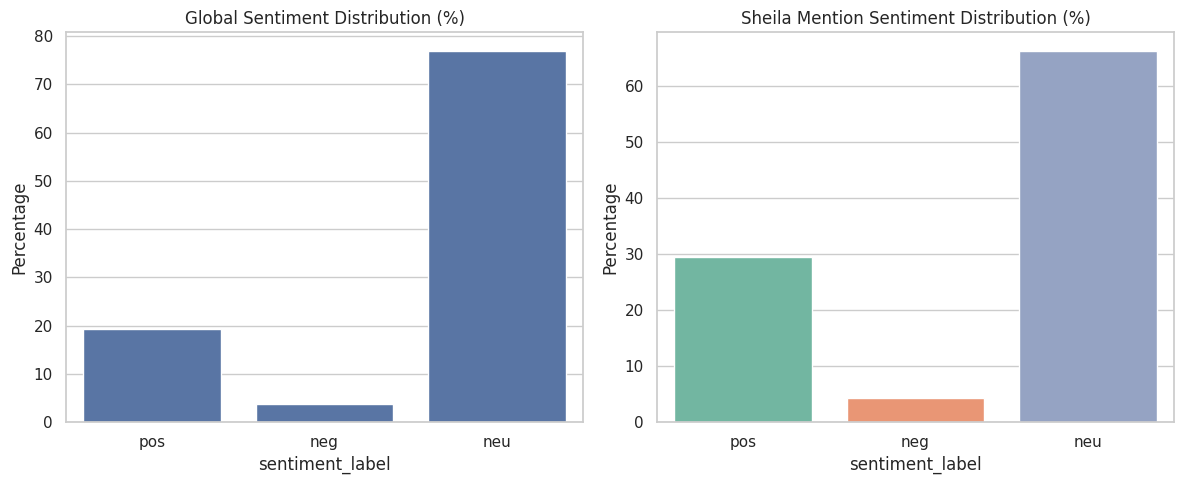

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.barplot(x=dist_global.index, y=dist_global.values, ax=axes[0])
axes[0].set_title('Global Sentiment Distribution (%)')
axes[0].set_ylabel('Percentage')

sns.barplot(x=dist_sheila.index, y=dist_sheila.values, ax=axes[1], palette='Set2')
axes[1].set_title('Sheila Mention Sentiment Distribution (%)')
axes[1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()


In [ ]:
# Share (%) of comments mentioning Sheila
sheila_share_pct = df['has_sheila'].mean() * 100

# Emoji density (mean emojis per comment)
emoji_global = df['emoji_count'].mean()
emoji_sheila = df[df['has_sheila']]['emoji_count'].mean()
emoji_lift = (emoji_sheila - emoji_global)

# Clamp helper to avoid negative contribution for lifts
def clamp_zero(x):
    return max(0, x)

impact_raw = (
    0.4 * sheila_share_pct +
    0.4 * clamp_zero(positive_lift) +
    0.2 * clamp_zero(emoji_lift * 10)  # scale emoji lift for balance
)

sheila_impact_v0 = round(impact_raw, 2)

impact_components = {
    'sheila_share_pct' : round(sheila_share_pct,2),
    'positive_lift_pp' : round(positive_lift,2),
    'emoji_lift_raw'   : round(emoji_lift,3),
    'computed_impact_v0': sheila_impact_v0
}

impact_in_percent = {}

for key, value in impact_components.items():
    if key == 'emoji_lift_raw':
        impact_in_percent[key] = f"{value * 100:.1f}%"
    else:
        impact_in_percent[key] = f"{value:.2f}%"

# Cetak hasilnya
print(impact_components)
print(impact_in_percent)



{'sheila_share_pct': np.float64(16.33), 'positive_lift_pp': np.float64(10.25), 'emoji_lift_raw': np.float64(0.012), 'computed_impact_v0': np.float64(10.66)}
{'sheila_share_pct': '16.33%', 'positive_lift_pp': '10.25%', 'emoji_lift_raw': '1.2%', 'computed_impact_v0': '10.66%'}


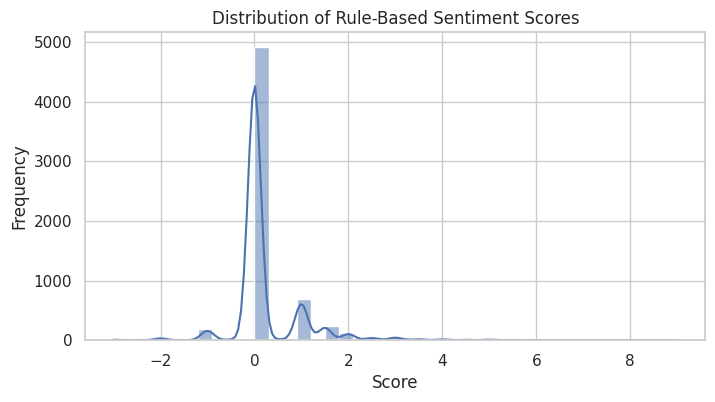

,sentiment_score
count,6394.000000
mean,0.245074
std,0.792580
min,-3.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9.000000


In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['sentiment_score'], bins=40, kde=True)
plt.title('Distribution of Rule-Based Sentiment Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

df['sentiment_score'].describe()


Top Positive Terms:


,term,count
13,suka,243
18,bagus,202
12,keren,195
10,lucu,130
9,sehat,113
16,cantik,105
2,bahagia,71
14,terbaik,68
0,seneng,58
28,wah,47


Top Negative Terms:


,term,count
2,kurang,61
3,sedih,58
1,sakit,44
0,parah,43
8,takut,27
9,aneh,23
6,gagal,21
7,bosen,15
16,masalah,11
15,jelek,9


/tmp/ipython-input-122-1787310187.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=neg_df, y='term', x='count', ax=axes[1], palette='flare')


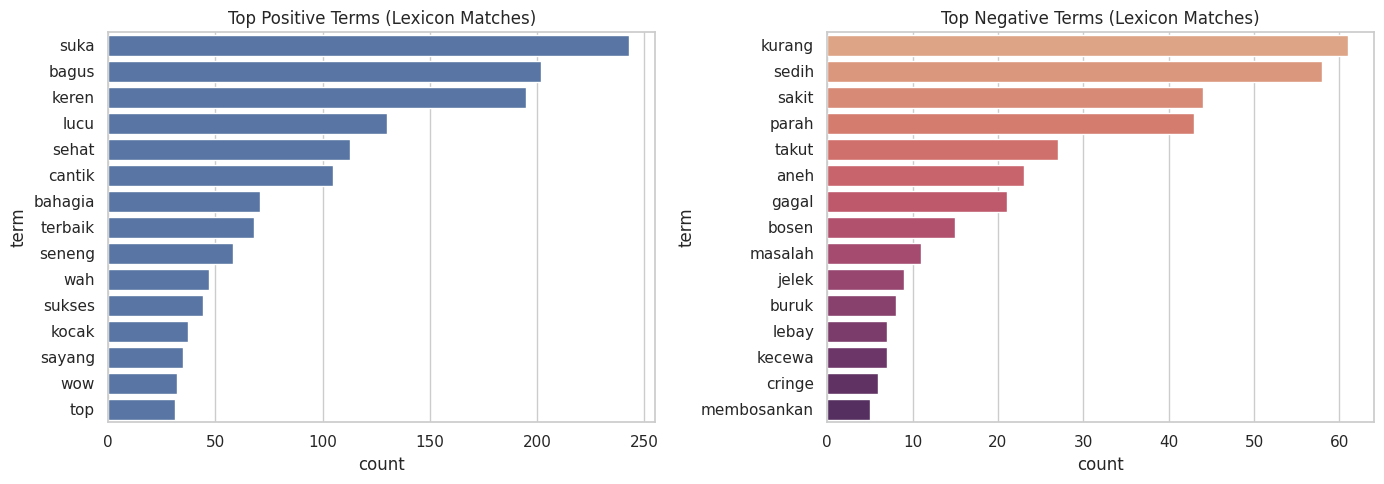

In [ ]:
pos_hits = {}
neg_hits = {}

for tokens in df['tokens']:
    for t in tokens:
        if t in lex_pos:
            pos_hits[t] = pos_hits.get(t,0)+1
        if t in lex_neg:
            neg_hits[t] = neg_hits.get(t,0)+1

pos_df = (pd.DataFrame(pos_hits.items(), columns=['term','count'])
          .sort_values('count', ascending=False).head(15))
neg_df = (pd.DataFrame(neg_hits.items(), columns=['term','count'])
          .sort_values('count', ascending=False).head(15))

print("Top Positive Terms:")
display(pos_df)
print("Top Negative Terms:")
display(neg_df)

fig, axes = plt.subplots(1,2, figsize=(14,5))
sns.barplot(data=pos_df, y='term', x='count', ax=axes[0])
axes[0].set_title('Top Positive Terms (Lexicon Matches)')
sns.barplot(data=neg_df, y='term', x='count', ax=axes[1], palette='flare')
axes[1].set_title('Top Negative Terms (Lexicon Matches)')
plt.tight_layout()
plt.show()


In [ ]:
# Sample a subset for manual labeling - fill in 'manual_label' later with pos/neg/neu
sample_validate = df.sample(min(50, len(df)))[['comment_raw','sentiment_label','sentiment_score']]
sample_validate['manual_label'] = ''   # fill manually outside if desired
sample_validate.reset_index(drop=True, inplace=True)
sample_validate.head(15)


,comment_raw,sentiment_label,sentiment_score,manual_label
0,Yg udah pernah nonton yg dari versi tropicana ...,neu,0.0,
1,Vidi kelihatan happy bgt ada ibu negara langg...,neu,0.0,
2,"Cuma mau ngasih tau, sore film seseru itu. Dar...",neu,0.0,
3,Yang aku tunggu,neu,0.0,
4,Film pertama kesukaan lu Jumbo,neu,0.0,
5,10/10,neu,0.0,
6,Ketika 2 introvert bertemu dan obrolannya nyam...,neu,0.0,
7,"Terima kasih Yandy dan Daniel, podcast ini mem...",pos,2.0,
8,Kenapa vidi,neu,0.0,
9,Yandi sutradara cerdas sih. Penuh kejutan.,neu,0.0,


In [ ]:
df

,username,comment,username_raw,comment_raw,comment_clean,comment_plain,char_len,token_len,has_question,emoji_count,has_sheila,tokens,bigrams,sentiment_score,sentiment_label
0,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...,212,35,False,0,True,"[om, ded, kaya, seneng, bangga, bgttt, lihat, ...","[om ded, ded kaya, kaya seneng, seneng bangga,...",8.0,pos
1,@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...",@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...","gila sabtu ini gue bahagia banget,sheila dtg k...",gila sabtu ini gue bahagia banget sheila dtg k...,104,19,False,0,True,"[gila, sabtu, ini, gue, bahagia, banget, sheil...","[gila sabtu, sabtu ini, ini gue, gue bahagia, ...",3.0,pos
2,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,salut sama keterbukaan dan kejujuran vidi & sh...,salut sama keterbukaan dan kejujuran vidi shei...,215,31,False,0,True,"[salut, sama, keterbukaan, dan, kejujuran, vid...","[salut sama, sama keterbukaan, keterbukaan dan...",5.0,pos
3,@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ...",@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ...","ya allah, beri vidi kesehatan & panjang umur, ...",ya allah beri vidi kesehatan panjang umur krn ...,86,13,False,0,False,"[ya, allah, beri, vidi, kesehatan, panjang, um...","[ya allah, allah beri, beri vidi, vidi kesehat...",2.0,pos
4,@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape...",@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape...","dari awal cuma mau nonton iseng, eh malah dape...",dari awal cuma mau nonton iseng eh malah dapet...,133,23,False,0,True,"[dari, awal, cuma, mau, nonton, iseng, eh, mal...","[dari awal, awal cuma, cuma mau, mau nonton, n...",1.0,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10216,@danangari867,Ngak ada yg sempurna paling ngak 9 untuk pasan...,@danangari867,Ngak ada yg sempurna paling ngak 9 untuk pasan...,ngak ada yg sempurna paling ngak 9 untuk pasan...,ngak ada yg sempurna paling ngak 9 untuk pasan...,67,12,False,0,False,"[ngak, ada, yg, sempurna, paling, ngak, 9, unt...","[ngak ada, ada yg, yg sempurna, sempurna palin...",0.0,neu
10722,@yohanajuniar2902,ternyata sama sama libra pantes ni 1 2 ngeseli...,@yohanajuniar2902,ternyata sama sama libra pantes ni 1 2 ngeseli...,ternyata sama sama libra pantes ni 1 2 ngeseli...,ternyata sama sama libra pantes ni 1 2 ngeseli...,50,9,False,0,False,"[ternyata, sama, sama, libra, pantes, ni, 1, 2...","[ternyata sama, sama sama, sama libra, libra p...",0.0,neu
11375,@Jerden25,Sore IDAMAN (Sore Istri DAri MAsa depaN) BOOM...,@Jerden25,Sore IDAMAN (Sore Istri DAri MAsa depaN) BOOM...,sore idaman (sore istri dari masa depan) boom!...,sore idaman sore istri dari masa depan boom be...,96,15,False,0,False,"[sore, idaman, sore, istri, dari, masa, depan,...","[sore idaman, idaman sore, sore istri, istri d...",0.0,neu
11376,@GooglenyaMasBintang,KEREN!,@GooglenyaMasBintang,KEREN!,keren!,keren,6,1,False,0,False,[keren],[],1.0,pos


In [ ]:
# Menghapus baris duplikat berdasarkan semua kolom
# Anda bisa memilih subset kolom jika duplikat hanya dipertimbangkan berdasarkan kolom tertentu
df_cleaned = df_merge.drop_duplicates()
print(f"\nJumlah baris setelah menghilangkan duplikat: {len(df_cleaned)}")


Jumlah baris setelah menghilangkan duplikat: 11340


In [ ]:
# Mengubah teks menjadi huruf kecil dan menghilangkan spasi ekstra
df_cleaned['comment'] = df_cleaned['comment'].astype(str).str.lower().str.strip()
df_cleaned['username'] = df_cleaned['username'].astype(str).str.lower().str.strip()

/tmp/ipython-input-9-1929744472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['comment'] = df_cleaned['comment'].astype(str).str.lower().str.strip()
/tmp/ipython-input-9-1929744472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['username'] = df_cleaned['username'].astype(str).str.lower().str.strip()


In [ ]:
print("\nContoh data setelah pembersihan teks (kolom 'comment' dan 'username'):")
df_cleaned[['username', 'comment']].head()


Contoh data setelah pembersihan teks (kolom 'comment' dan 'username'):


,username,comment
0,@najmamld,om ded kaya seneng bangga bgttt lihat mereka b...
1,@rezadimas3520,gila sabtu ini gue bahagia bangetsheila dtg ke...
2,@bahantoto_official,salut sama keterbukaan dan kejujuran vidi she...
3,@linarain8402,ya allah beri vidi kesehatan panjang umur krn...
4,@dwv99-khusus-sultan,dari awal cuma mau nonton iseng eh malah dapet...


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11340 entries, 0 to 11384
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   username      11340 non-null  object
 1   comment       11340 non-null  object
 2   link_video    11340 non-null  object
 3   publish_date  11340 non-null  object
 4   like_count    11340 non-null  int64 
 5   view_count    11340 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 620.2+ KB



--- 10 Username Paling Aktif ---
username
@widy-w4s                     34
nan                           26
@asmitasariasis               17
@erggggggy                    16
@hr-2605                      14
@icanur35                     12
@yodinarosafiltuhumena4795    12
@agvelfakhri6168              11
@sendy483                     11
@fanifadilah2366              11
Name: count, dtype: int64


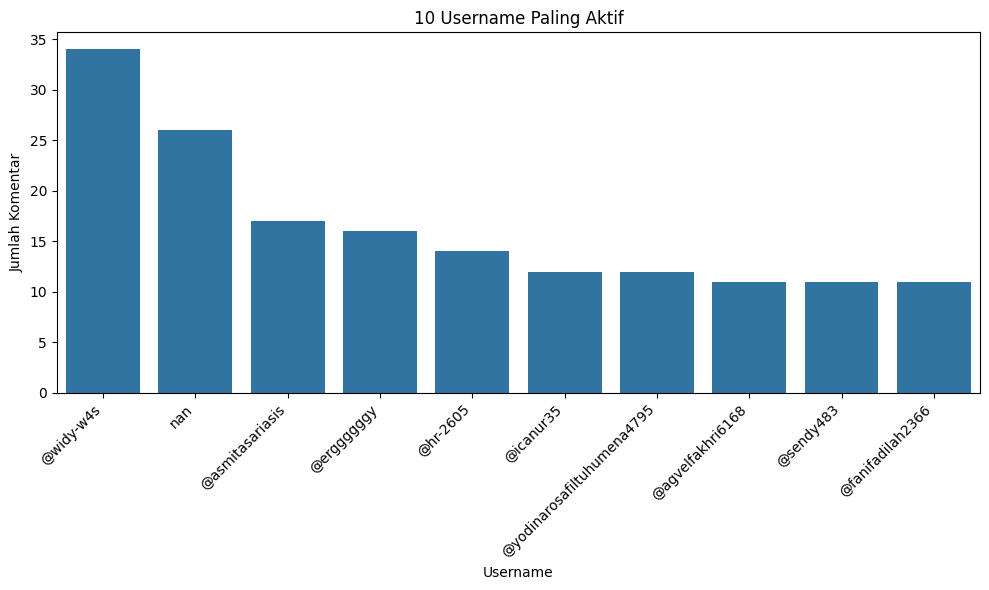

In [ ]:
print("\n--- 10 Username Paling Aktif ---")
top_usernames = df_cleaned['username'].value_counts().head(10)
print(top_usernames)

# Visualisasi (opsional, jika Anda ingin melihatnya dalam grafik)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_usernames.index, y=top_usernames.values)
plt.title('10 Username Paling Aktif')
plt.xlabel('Username')
plt.ylabel('Jumlah Komentar')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_cleaned

,username,comment,link_video,publish_date,like_count,view_count
0,@najmamld,om ded kaya seneng bangga bgttt lihat mereka b...,https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
1,@rezadimas3520,gila sabtu ini gue bahagia bangetsheila dtg ke...,https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
2,@bahantoto_official,salut sama keterbukaan dan kejujuran vidi she...,https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
3,@linarain8402,ya allah beri vidi kesehatan panjang umur krn...,https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
4,@dwv99-khusus-sultan,dari awal cuma mau nonton iseng eh malah dapet...,https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
...,...,...,...,...,...,...
11380,@kinshafanaillufar7112,kak sheila hidupnya lurus lurus aja jadi hal y...,https://www.youtube.com/watch?v=HtprXG01wO0&pp...,2025-06-19,189,6254
11381,@perkyoracles7534,dion lucu banget,https://www.youtube.com/watch?v=HtprXG01wO0&pp...,2025-06-19,189,6254
11382,@randilkwu7276,cant wait,https://www.youtube.com/watch?v=HtprXG01wO0&pp...,2025-06-19,189,6254
11383,@tomiyamaekasetiaandini,nah 8 min aja ya bang dion 30 min kepanjangan,https://www.youtube.com/watch?v=HtprXG01wO0&pp...,2025-06-19,189,6254


In [ ]:
# !pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 37.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=b24a2598e571dedf93b4164cd55ee70ff8e19e09fb12be18ff44a2362ce88a2c
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
# from langdetect import detect
# from langdetect.lang_detect_exception import LangDetectException
# import pandas as pd

# # Asumsikan df_cleaned adalah DataFrame Anda yang sudah bersih dari langkah sebelumnya
# # Jika nama DataFrame Anda berbeda, sesuaikan.

# # Fungsi untuk mendeteksi bahasa dengan penanganan error
# def detect_language(text):
#     try:
#         # Pastikan teks tidak kosong atau hanya spasi sebelum deteksi
#         if isinstance(text, str) and text.strip():
#             return detect(text)
#         else:
#             # return 'unknown' # Atau 'empty' jika Anda ingin membedakannya
#     except LangDetectException:
#         return 'error' # Untuk kasus di mana bahasa tidak dapat dideteksi

# # Terapkan fungsi deteksi bahasa ke kolom 'comment'
# # Pastikan kolom 'comment' sudah berformat string dan tidak ada NaN (setelah cleaning sebelumnya)
# df_cleaned['detected_language'] = df_cleaned['comment'].apply(detect_language)

# print("--- 10 Bahasa Teratas yang Terdeteksi dalam Komentar ---")
# print(df_cleaned['detected_language'].value_counts().head(10))

# # Filter DataFrame untuk hanya menyertakan komentar berbahasa Indonesia ('id')
# df_indonesian_comments = df_cleaned[df_cleaned['detected_language'] == 'id'].copy()

# print(f"\nJumlah komentar sebelum filter bahasa: {len(df_cleaned)}")
# print(f"Jumlah komentar berbahasa Indonesia: {len(df_indonesian_comments)}")

# print("\n--- Contoh Komentar Berbahasa Inggris yang Terdeteksi ---")
# print(df_cleaned[df_cleaned['detected_language'] == 'en']['comment'].head())

# print("\n--- Head dari DataFrame Setelah Filter (Hanya Bahasa Indonesia) ---")
# print(df_indonesian_comments.head())

# # Anda sekarang bisa melanjutkan EDA atau analisis lebih lanjut dengan df_indonesian_comments

In [ ]:
df_indonesian_comments

,username,comment,link_video,detected_language
0,ketiksajabahantoto,sheila dara cinta dari kucing itu harus diusah...,https://www.youtube.com/watch?v=0kbiBpff7O0&pp...,id
1,cynthiaamanda2283,jujur flow interviewnya mulus bangett dari bah...,https://www.youtube.com/watch?v=0kbiBpff7O0&pp...,id
2,rmpbuyung,sheila harus jadi best actress tahun ini cape...,https://www.youtube.com/watch?v=0kbiBpff7O0&pp...,id
3,bobysetiawan,dua orang introvert beneran ngobrol,https://www.youtube.com/watch?v=0kbiBpff7O0&pp...,id
4,juaradivisi4d,mereka berdua matanya berkacakaca bangett pas ...,https://www.youtube.com/watch?v=0kbiBpff7O0&pp...,id
...,...,...,...,...
21491,inxn4pc,kapan segeranya lebaran kah,https://www.youtube.com/watch?v=LbAwk51zTGI&pp...,id
21492,agungpribumi,kembali berpasangan\nemang kapan mereka pernah...,https://www.youtube.com/watch?v=LbAwk51zTGI&pp...,id
21494,ekohandoyo961,kenapa diganit pemeran wanitanya,https://www.youtube.com/watch?v=LbAwk51zTGI&pp...,id
21495,niputuestiutamibarsua372,mc nya bagus banget ngebawa obrolannya jadi ny...,https://www.youtube.com/watch?v=GEmZU44_ZpI&pp...,id



--- 10 Link Video dengan Komentar Terbanyak ---
link_video
https://www.youtube.com/watch?v=pz7Jyew3xUw&pp=ygULU0hFSUxBIERBUkE%3D                    1247
https://www.youtube.com/watch?v=pz7Jyew3xUw&pp=ygULU2hlaWxhIERhcmE%3D                    1247
https://www.youtube.com/watch?v=FcMT6bA3oj4&pp=ygULU2hlaWxhIERhcmE%3D                    1057
https://www.youtube.com/watch?v=0kbiBpff7O0&pp=ygULU2hlaWxhIERhcmE%3D                     857
https://www.youtube.com/watch?v=0kbiBpff7O0&pp=ygUJU29yZSBGaWxt                           855
https://www.youtube.com/watch?v=0kbiBpff7O0&pp=ygULU0hFSUxBIERBUkE%3D                     854
https://www.youtube.com/watch?v=QKJ-uFQgFSo&pp=ygUJU29yZSBGaWxt                           827
https://www.youtube.com/watch?v=ul0kBlV9Plk&pp=ygULU2hlaWxhIERhcmE%3D                     681
https://www.youtube.com/watch?v=ul0kBlV9Plk&pp=ygULU0hFSUxBIERBUkE%3D                     680
https://www.youtube.com/watch?v=FcMT6bA3oj4&pp=ygULU0hFSUxBIERBUkHSBwkJzQkBhyohjO8%3D     529


/tmp/ipython-input-14-2710263928.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


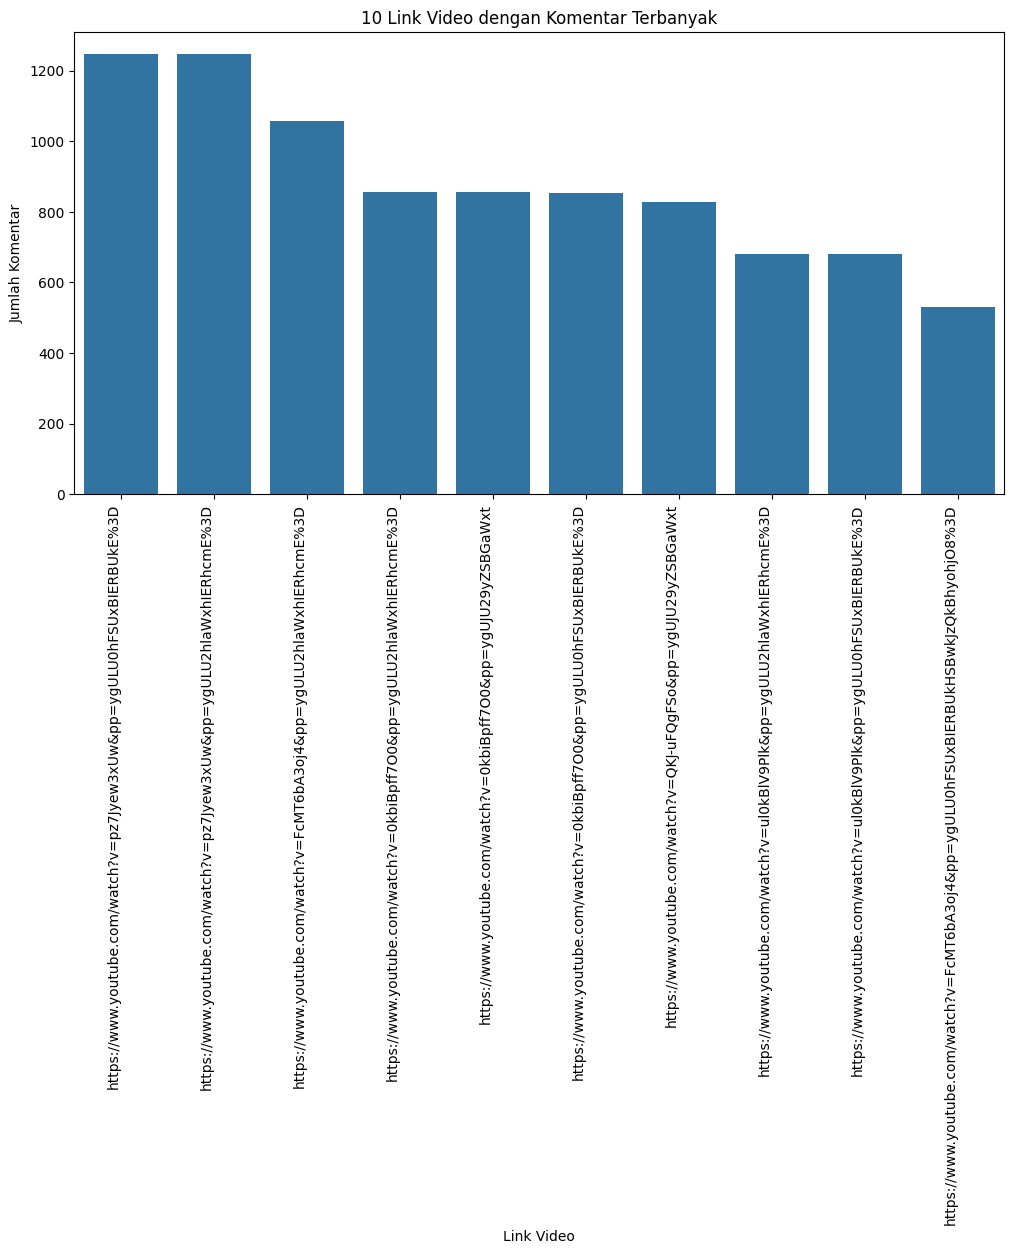

In [ ]:
print("\n--- 10 Link Video dengan Komentar Terbanyak ---")
top_videos = df_cleaned['link_video'].value_counts().head(10)
print(top_videos)

# Visualisasi (opsional)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_videos.index, y=top_videos.values)
plt.title('10 Link Video dengan Komentar Terbanyak')
plt.xlabel('Link Video')
plt.ylabel('Jumlah Komentar')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()